# Random Forest Classifier on images of hand-written digits

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits  = load_digits()

In [2]:
dir(digits) 

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

<Figure size 432x288 with 0 Axes>

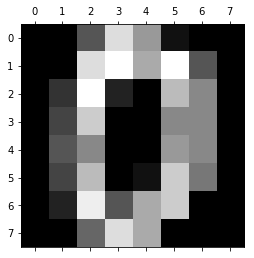

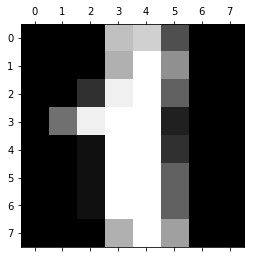

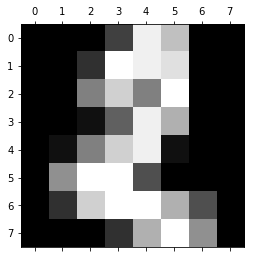

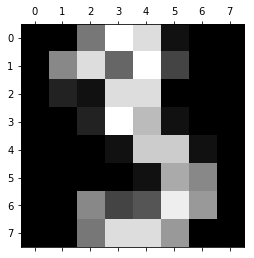

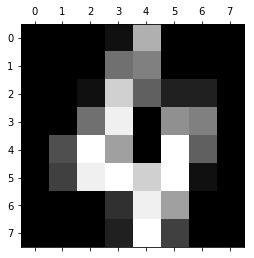

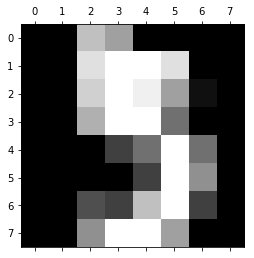

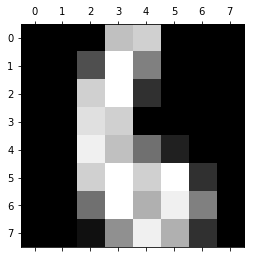

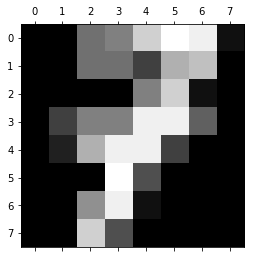

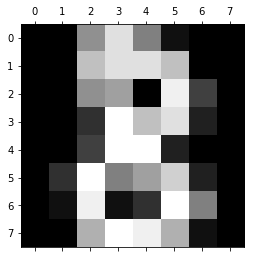

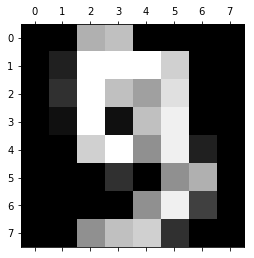

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [7]:
# create datafream
df= pd.DataFrame(digits.data)

In [8]:
digits.data[:5]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
len(digits.target)

1797

In [11]:
# now will add arget to out digit dataframe
df['target']=digits.target                                             # create new column target 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
x = df.iloc[:,:64]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
y = df.iloc[:,64]
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [15]:
from sklearn.ensemble import RandomForestClassifier                # ensemble means agregation together
model = RandomForestClassifier()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
model.score(x_train,y_train)*100

99.93041057759221

In [17]:
y_pred= model.predict(x_test)
y_pred

array([8, 0, 2, 2, 4, 1, 0, 3, 7, 2, 5, 5, 3, 4, 6, 3, 4, 1, 4, 8, 7, 7,
       7, 3, 7, 4, 6, 5, 6, 8, 7, 0, 9, 6, 8, 9, 5, 8, 4, 6, 3, 6, 3, 2,
       1, 8, 2, 1, 1, 6, 4, 2, 6, 7, 6, 4, 1, 9, 2, 5, 0, 0, 0, 7, 0, 8,
       4, 0, 2, 3, 3, 9, 8, 6, 9, 7, 5, 0, 2, 8, 8, 1, 3, 1, 1, 3, 7, 3,
       4, 8, 2, 6, 5, 1, 7, 0, 6, 2, 6, 0, 4, 1, 2, 1, 2, 3, 3, 6, 6, 1,
       9, 7, 0, 0, 9, 7, 8, 0, 8, 7, 5, 6, 6, 2, 9, 8, 4, 9, 2, 7, 6, 9,
       1, 8, 2, 6, 1, 7, 4, 8, 8, 6, 8, 1, 3, 0, 1, 3, 5, 5, 0, 5, 5, 3,
       3, 4, 6, 1, 8, 9, 7, 6, 7, 5, 4, 2, 6, 2, 3, 1, 5, 6, 0, 4, 3, 5,
       6, 1, 9, 4, 4, 3, 7, 6, 0, 3, 5, 2, 9, 6, 0, 9, 2, 5, 1, 5, 8, 0,
       7, 5, 5, 6, 5, 2, 6, 9, 0, 7, 1, 3, 1, 4, 7, 0, 4, 3, 0, 0, 7, 6,
       6, 9, 4, 2, 4, 1, 6, 9, 8, 2, 2, 5, 2, 8, 4, 4, 9, 3, 4, 3, 7, 6,
       9, 6, 9, 9, 1, 2, 6, 5, 4, 7, 8, 1, 9, 0, 9, 3, 2, 2, 4, 7, 3, 5,
       8, 0, 0, 4, 4, 9, 4, 7, 9, 7, 5, 3, 0, 5, 5, 5, 1, 8, 7, 1, 3, 1,
       7, 3, 3, 6, 2, 2, 0, 8, 2, 0, 2, 0, 1, 5, 8,

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  1, 36,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  2, 29]], dtype=int64)

In [19]:
cm.sum()

360

Text(69.0, 0.5, 'Truth')

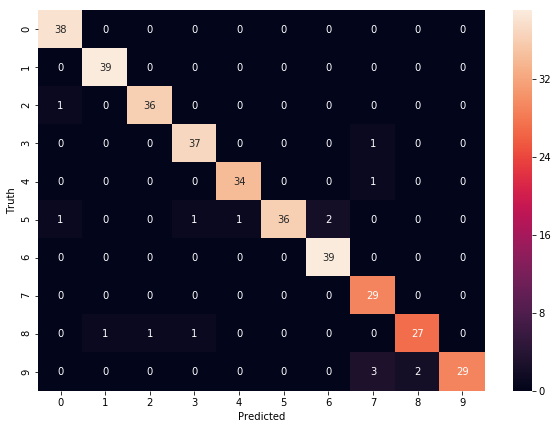

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
df['target'].value_counts() 

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [22]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)